<a href="https://colab.research.google.com/github/abiakshar/TSF_GRIP-Projects/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Abirami Baskaran**

# **Task 2: Prediction Using Decision Tree Algorithm**

Use the Decision Tree classification algorithm to build a model from data of Iris plant, and what class is a flower with the respective feature? Then use the trained decision tree to predict the class of a species.

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### **About the Dataset**

To build a model to classify Iris plant into three species which might be appropriate with some properties about each flower. The feature sets of this dataset are SepalLength, SepalWidth, PetalLength, PetalWidth and the target is the Species.

It is a sample of binary classifier, and we can use the training part of the dataset to build a decision tree, and then use it to predict a new data.

In [4]:
# read the data using pandas dataframe
import io
iris_data=pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

In [5]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris_data.shape

(150, 6)

In [8]:
iris_data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

### **Pre-Processing**

* X as the Feature Matrix (data of iris_data)
* y as the response vector (target)



In [9]:
X=iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
y=iris_data[['Species']]
y[0:5]

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


### **Setting up the Decision Tree**

Let's import train/test split

Now train_test_split will return 4 different parameters:

X_trainset, X_testset, y_trainset, y_testset

The train_test_split will need the parameters:

X, y, test_size=0.3, and random_state=3.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_trainset,X_testset,y_trainset,y_testset=train_test_split(X,y,test_size=0.3,random_state=3)

In [13]:
print("Trainset:",X_trainset.shape,y_trainset.shape)

Trainset: (105, 4) (105, 1)


In [14]:
print("Testset:",X_testset.shape,y_testset.shape)

Testset: (45, 4) (45, 1)


### **Modelling**

Create an instance of the DecisionTreeClassifier called speciestree.  
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [15]:
speciestree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
speciestree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Next, fit the data with the training feature matrix X_trainset and training response vector y_trainset

In [16]:
speciestree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Prediction**

Let's make some predictions on the testing dataset and store it into a variable called predtree

In [17]:
predtree=speciestree.predict(X_testset)

Printout predtree and y_testset to visually compare the prediction to the actual values.


In [18]:
print(predtree [0:5])
print(y_testset [0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
        Species
47  Iris-setosa
3   Iris-setosa
31  Iris-setosa
25  Iris-setosa
15  Iris-setosa


### **Evaluation**

Let's import metrics from sklearn and check the accuracy of the model



In [19]:
from sklearn import metrics
print("DecisionTreeAccuracy:",metrics.accuracy_score(y_testset,predtree))

DecisionTreeAccuracy: 0.9555555555555556


### **Visualization**

Let's visualize the tree

The basic intiution behind a decision tree is to map out all possible decision paths in the form of a tree.

Decision Tree Learning Algorithm:
1. Choose an attribute from the dataset.
2. Calculate the significance of attribute in splitting of data.
3. Split the data based on the value of the best attribute
4. Go to step 1



In [20]:
!pip install six
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


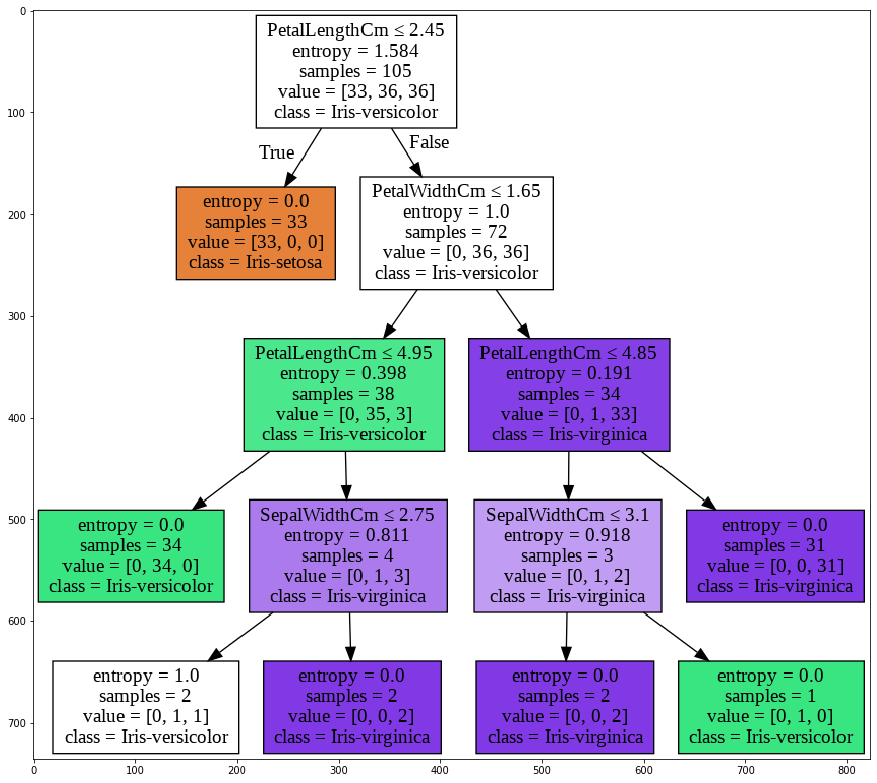

In [21]:
dot_data = StringIO()
filename = "speciestree.png"
featureNames = iris_data.columns[1:5]
targetNames = iris_data["Species"].unique().tolist()
out=tree.export_graphviz(speciestree,feature_names=featureNames, out_file=dot_data, class_names=np.unique(y_trainset), node_ids=False,filled=True, special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(15, 15))
plt.imshow(img,interpolation='nearest')